# A Quick Introduction to TensorFlow 2.0 for Deep Learning
## https://towardsdatascience.com/a-quick-introduction-to-tensorflow-2-0-for-deep-learning-e740ca2e974c
## by George Seif, Oct 24, 2019
### Google Colab Notebook can be found at: https://colab.research.google.com/drive/1KRi0k5XTJoKEuRGOMRy3xhaUU_txNCYm

### YP 200330

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

## Loading data and visualisation
### MNIST dataset contains
    * 60,000 training images
    * 10,000 test images
    * digits from 0 to 9
    * size 28x28

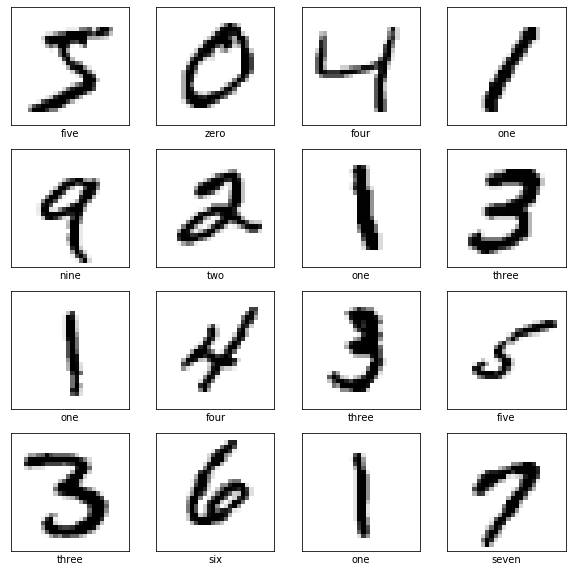

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Model Definition

In [4]:
IMG_SIZE = (28, 28, 1)
input_img = layers.Input(shape=IMG_SIZE)

model = layers.Conv2D(32, (3, 3), padding='same')(input_img)
model = layers.Activation('relu')(model)
model = layers.Conv2D(32, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same', strides=(2, 2))(model)
model = layers.Activation('relu')(model)

model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)
model = layers.Conv2D(64, (3, 3), padding='same')(model)
model = layers.Activation('relu')(model)

model = layers.GlobalAveragePooling2D()(model)
model = layers.Dense(32)(model)
model = layers.Activation('relu')(model)
model = layers.Dense(10)(model)
output_img = layers.Activation('softmax')(model)

model = models.Model(input_img, output_img)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0     

## Training and Testing

In [5]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [6]:
adam = optimizers.Adam(lr=0.0001)
model.compile(adam, loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.7584 - accuracy: 0.7474 - val_loss: 0.3452 - val_accuracy: 0.9013
Epoch 2/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2451 - accuracy: 0.9297 - val_loss: 0.1927 - val_accuracy: 0.9433
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1698 - accuracy: 0.9506 - val_loss: 0.1262 - val_accuracy: 0.9647
Epoch 4/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1330 - accuracy: 0.9606 - val_loss: 0.0880 - val_accuracy: 0.9726
Epoch 5/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1091 - accuracy: 0.9674 - val_loss: 0.0942 - val_accuracy: 0.9714
Epoch 6/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0923 - accuracy: 0.9729 - val_loss: 0.0848 - val_accuracy: 0.9734
Epoch 7/10
60000/60000 [==========================

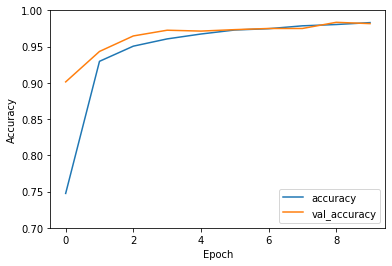

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

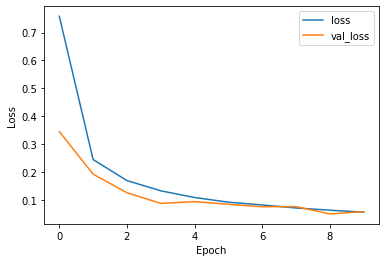

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [9]:
test_loss, test_accuracy = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy = {0:.2f}%'.format(test_accuracy*100.0))

10000/1 - 0s - loss: 0.0293 - accuracy: 0.9817

Test accuracy = 98.17%
